In [5]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt




In [52]:

α=0.5
β=0.3
N0 = 1000000
S0 = 990000
I0 = 7000
R0 = 3000
t_0 = 0
t_f = 25 

tlinspace=np.linspace(0,25,1000)






In [ ]:
#1-Решить дифференциальное уравнение (2) и построить график функции S(t) 
#                                   dt/dS=−αS




No handles with labels found to put in legend.


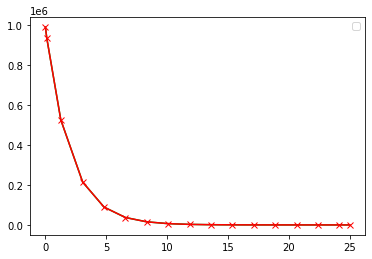

In [53]:
def dsdt(t,S):
    return -α*S

solS = solve_ivp(dsdt, (t_0, t_f), [S0], dense_output = True)
t, y = solS.t, solS.y[0]
z, = solS.sol(t)
plt.plot(t, z, color = 'g')
plt.plot(t, y, 'x-r')

plt.legend()

In [ ]:
#Решить дифференциальное уравнение (3) и построить график функции I(t)I(t)
#                                     dt/dI=αS−βI

No handles with labels found to put in legend.


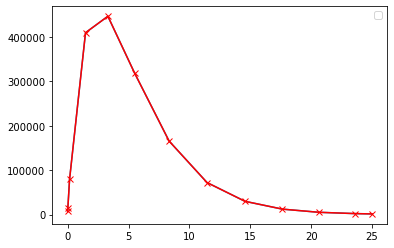

In [58]:
def didt(t, i):
    s = solS.sol(t)
    return α * s - β * i

solI = solve_ivp(didt, (t_0, t_f), [I0], dense_output = True)
t, y = solI.t, solI.y[0]
z, = solI.sol(t)
plt.plot(t, z)
plt.plot(t, y, 'x-r')

plt.legend()

In [ ]:
# Используя решения уравнений (2) и (3), с помощью уравнения (1), найти решение уравнения (4) 
# (используйте интерполяцию interp1d) и построить график функции R(t)
#dR/dt = βI
#S(t)+I(t)+R(t)=N


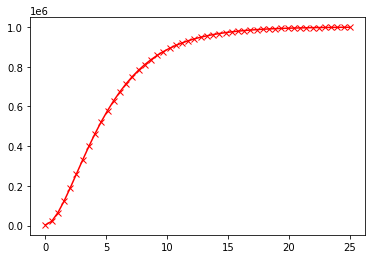

In [62]:
solR=[]
tlinspace=np.linspace(0,25,50)
for m in tlinspace:
    res=N-solI.sol(m)-solS.sol(m)
    solR.append(res[0])
f=interp1d(tlinspace,solR,kind='cubic')
plt.plot(tlinspace,f(tlinspace),"x-r")


In [ ]:
#Построить все три графика S(t), I(t) и R(t) на одной области отображения

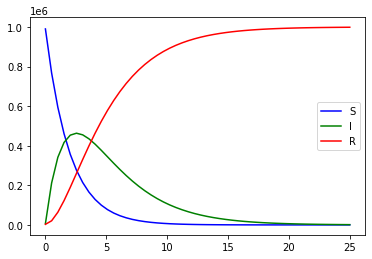

In [61]:
st = solS.sol(tlinspace)
it = solI.sol(tlinspace)

fig, ax = plt.subplots()




ax.plot(tlinspace, st[0], color = 'b', label = 'S')
ax.plot(tlinspace, it[0], color = 'g', label = 'I')
ax.plot(tlinspace, f(tlinspace), color = 'r', label = 'R')
ax.legend()